Завдання:

- Створіть власний набір даних для регресії.
- Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.
- Спробуйте покращити результати, використовуючи такі підходи:
- Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).
- Збільшення кількості нейронів у кожному шарі.
- Ознайомтеся з документацією Adam та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?
- Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?
- Знайдіть відповідний код та побудуйте графік зміни функції втрат на тренувальному та тестувальному наборі даних під час тренування останньої моделі.

In [43]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [30]:
#build own dataset for regression
X, y = make_regression(n_samples=3000, n_features=19, n_informative=2, bias=24.6, noise=27, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# 3-х шарова та 200 епох
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# компіляція та навчання нейронної мережі
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
history_1 = model_1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# оцінка моделі
train_loss_1 = model_1.evaluate(X_train, y_train, verbose=0)
print("\nВтрати на тренувальних даних (MAE):", train_loss)
test_loss_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Втрати на тестувальних даних (MAE):", test_loss)

Epoch 1/200
75/75 [==============================] - 2s 4ms/step - loss: 50.6850 - mae: 50.6850 - val_loss: 27.7397 - val_mae: 27.7397
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 24.0198 - mae: 24.0198 - val_loss: 23.6334 - val_mae: 23.6334
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 23.0276 - mae: 23.0276 - val_loss: 23.0478 - val_mae: 23.0478
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 22.4057 - mae: 22.4057 - val_loss: 23.4650 - val_mae: 23.4650
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 21.9538 - mae: 21.9538 - val_loss: 23.0704 - val_mae: 23.0704
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 21.6629 - mae: 21.6629 - val_loss: 22.9163 - val_mae: 22.9163
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 21.2804 - mae: 21.2804 - val_loss: 23.0186 - val_mae: 23.0186
Epoch 8/200
75/75 [==============================] - 0s

In [57]:
# 4-х шарова та 200 епох
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# компіляція та навчання нейронної мережі
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mae', metrics=['mae'])
history_2 = model_2.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# оцінка моделі
train_loss_2 = model_2.evaluate(X_train, y_train, verbose=0)
print("\nВтрати на тренувальних даних (MAE):", train_loss)
test_loss_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Втрати на тестувальних даних (MAE):", test_loss)

Epoch 1/200
75/75 [==============================] - 2s 5ms/step - loss: 77.7851 - mae: 77.7851 - val_loss: 80.1896 - val_mae: 80.1896
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 77.7283 - mae: 77.7283 - val_loss: 80.1264 - val_mae: 80.1264
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 77.6450 - mae: 77.6450 - val_loss: 80.0276 - val_mae: 80.0276
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 77.5127 - mae: 77.5127 - val_loss: 79.8641 - val_mae: 79.8641
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 77.3045 - mae: 77.3045 - val_loss: 79.6025 - val_mae: 79.6025
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 76.9829 - mae: 76.9829 - val_loss: 79.2059 - val_mae: 79.2059
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 76.5153 - mae: 76.5153 - val_loss: 78.6340 - val_mae: 78.6340
Epoch 8/200
75/75 [==============================] - 0s

In [35]:
# 4-х шарова та 200 епох
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# компіляція та навчання нейронної мережі (Adam x10)
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mae', metrics=['mae'])
history_3 = model_3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# оцінка моделі
train_loss_3 = model_3.evaluate(X_train, y_train, verbose=0)
print("\nВтрати на тренувальних даних (MAE):", train_loss)
test_loss_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Втрати на тестувальних даних (MAE):", test_loss)

Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 68.4219 - mae: 68.4219 - val_loss: 39.6483 - val_mae: 39.6483
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 28.9314 - mae: 28.9314 - val_loss: 25.2558 - val_mae: 25.2558
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 23.5011 - mae: 23.5011 - val_loss: 24.7365 - val_mae: 24.7365
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 22.0772 - mae: 22.0772 - val_loss: 24.4483 - val_mae: 24.4483
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 20.9581 - mae: 20.9581 - val_loss: 24.7143 - val_mae: 24.7143
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 20.0781 - mae: 20.0781 - val_loss: 25.1900 - val_mae: 25.1900
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 20.4353 - mae: 20.4353 - val_loss: 24.8536 - val_mae: 24.8536
Epoch 8/200
75/75 [==============================] - 0s

In [37]:
# 4-х шарова та 400 епох
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# компіляція та навчання нейронної мережі 
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
history_4 = model_4.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

# оцінка моделі
train_loss_4 = model_4.evaluate(X_train, y_train, verbose=0)
print("\Втрати на тренувальних даних (MAE):", train_loss)
test_loss_4 = model_4.evaluate(X_test, y_test, verbose=0)
print("Втрати на тестувальних даних (MAE):", test_loss)

Epoch 1/400
75/75 [==============================] - 1s 3ms/step - loss: 44.4199 - mae: 44.4199 - val_loss: 25.5195 - val_mae: 25.5195
Epoch 2/400
75/75 [==============================] - 0s 2ms/step - loss: 24.3322 - mae: 24.3322 - val_loss: 25.4486 - val_mae: 25.4486
Epoch 3/400
75/75 [==============================] - 0s 2ms/step - loss: 23.4321 - mae: 23.4321 - val_loss: 24.4378 - val_mae: 24.4378
Epoch 4/400
75/75 [==============================] - 0s 2ms/step - loss: 22.4505 - mae: 22.4505 - val_loss: 23.1579 - val_mae: 23.1579
Epoch 5/400
75/75 [==============================] - 0s 2ms/step - loss: 22.4596 - mae: 22.4596 - val_loss: 23.8532 - val_mae: 23.8532
Epoch 6/400
75/75 [==============================] - 0s 2ms/step - loss: 22.3152 - mae: 22.3152 - val_loss: 23.6404 - val_mae: 23.6404
Epoch 7/400
75/75 [==============================] - 0s 2ms/step - loss: 21.7958 - mae: 21.7958 - val_loss: 23.0913 - val_mae: 23.0913
Epoch 8/400
75/75 [==============================] - 0s

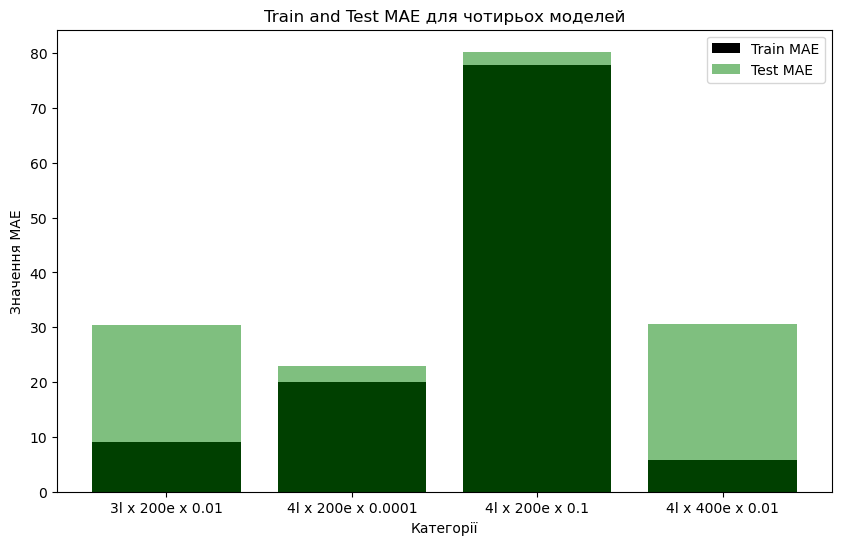

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Дані для діаграм
categories = ['3l x 200e x 0.01', '4l x 200e x 0.0001', '4l x 200e x 0.1', '4l x 400e x 0.01']
train_losses = [
    [train_loss_1[0], train_loss_1[1]],
    [train_loss_2[0], train_loss_2[1]],
    [train_loss_3[0], train_loss_3[1]],
    [train_loss_4[0], train_loss_4[1]]
]
test_losses = [
    [test_loss_1[0], test_loss_1[1]],
    [test_loss_2[0], test_loss_2[1]],
    [test_loss_3[0], test_loss_3[1]],
    [test_loss_4[0], test_loss_4[1]]
]

# Створення графіка
fig, ax = plt.subplots(figsize=(10, 6))

# Побудова стовпчатих діаграм
bar_width = 0.2
bar_positions1 = np.arange(len(categories))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
bar_positions3 = [pos + bar_width for pos in bar_positions2]
bar_positions4 = [pos + bar_width for pos in bar_positions3]

# Додаємо стовпці для тренувальних втрат
ax.bar(bar_positions1, [loss[0] for loss in train_losses], width=bar_width, label='Train MAE', color='black')
ax.bar(bar_positions2, [loss[0] for loss in train_losses], width=bar_width, color='black')
ax.bar(bar_positions3, [loss[0] for loss in train_losses], width=bar_width, color='black')
ax.bar(bar_positions4, [loss[0] for loss in train_losses], width=bar_width, color='black')

# Додаємо стовпці для тестових втрат
ax.bar(bar_positions1, [loss[1] for loss in test_losses], width=bar_width, label='Test MAE', color='green', alpha=0.5)
ax.bar(bar_positions2, [loss[1] for loss in test_losses], width=bar_width, color='green', alpha=0.5)
ax.bar(bar_positions3, [loss[1] for loss in test_losses], width=bar_width, color='green', alpha=0.5)
ax.bar(bar_positions4, [loss[1] for loss in test_losses], width=bar_width, color='green', alpha=0.5)

# Налаштування графіка
ax.set_xticks([pos + bar_width * 1.5 for pos in bar_positions1])
ax.set_xticklabels(categories)
ax.set_xlabel('Категорії')
ax.set_ylabel('Значення MAE')
ax.set_title('Train and Test MAE для чотирьох моделей')
ax.legend()

# Відображення графіка
plt.show()


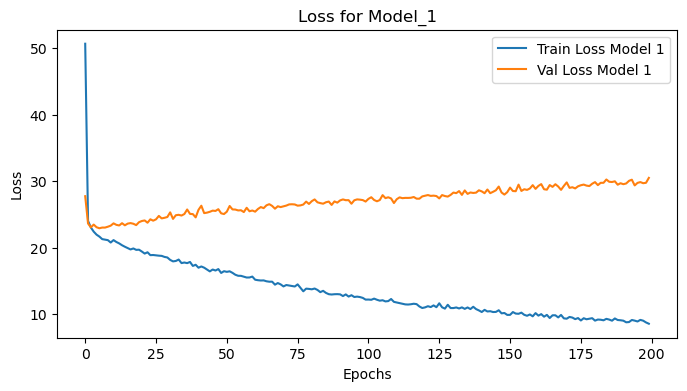

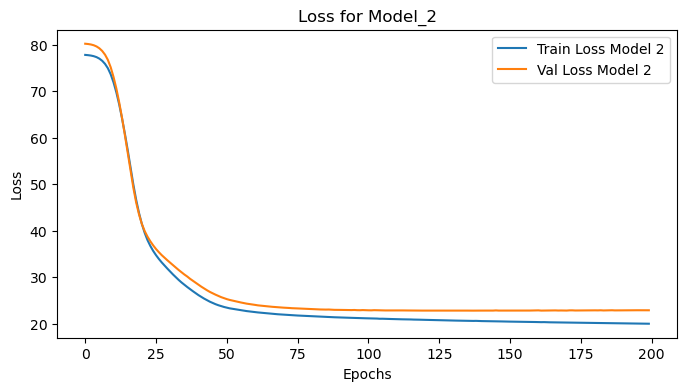

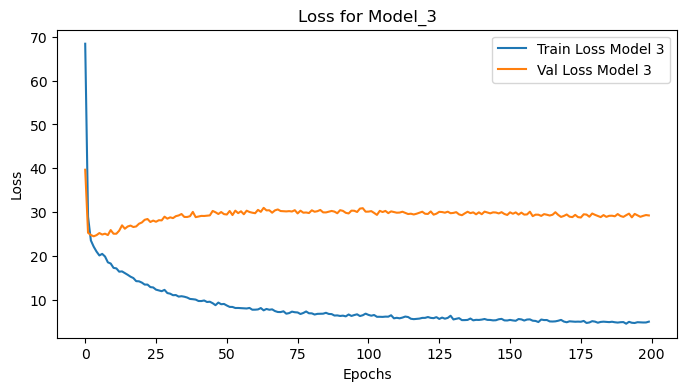

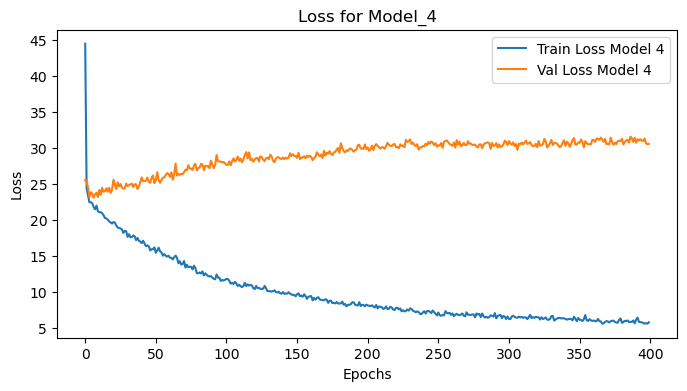

In [61]:
history_list = [history_1, history_2, history_3, history_4]

# Plot the training and validation loss for each model
for i, history in enumerate(history_list, start=1):
    plt.figure(figsize=(8, 4))  # Create a new figure for each model
    plt.plot(history.history['loss'], label='Train Loss Model {}'.format(i))
    plt.plot(history.history['val_loss'], label='Val Loss Model {}'.format(i))
    plt.title('Loss for Model_{}'.format(i))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()